<a href="https://colab.research.google.com/github/sukkyun2/big-data-visualization-and-analysis/blob/main/06.Data%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

### Task
- Find datasets that shows advantages and disadvantages of k-means,
hierarchical clustering and DBSCAN

### Dataset
- The clustering datasets
https://github.com/milaan9/Clustering-Datasets

### Requirements
- One successful example for k-means, hierarchical clustering and DBSCAN
- One unsuccessful example for k-means, hierarchical clustering and DBSCAN

### Data Overview

In [1]:
!ls

flame.csv  Mall_Customers.csv  r15.csv	sample_data  spiral.csv


In [2]:
import pandas as pd
import os

df_flame = pd.read_csv('flame.csv')
df_flame.head()

,col1,col2,target
0,1.85,27.80,1
1,1.35,26.65,1
2,1.40,23.25,2
3,0.85,23.05,2
4,0.50,22.35,2


In [3]:
df_customers = pd.read_csv('Mall_Customers.csv')
df_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df_r15 = pd.read_csv('r15.csv')
df_r15.head()

,col1,col2,target
0,9.802,10.132,1
1,10.350,9.768,1
2,10.098,9.988,1
3,9.730,9.910,1
4,9.754,10.430,1


In [5]:
df_spiral = pd.read_csv('spiral.csv')
df_spiral.head()

,col1,col2,target
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


### K-Means Clustering

#### Description

In the case of K-Means Clustering,

> the algorithm considers data points that are close to each other in terms of  Euclidean distance as part of the same cluster.


For the flame dataset,
> this works well because the points that are close together are also logically related, meaning they naturally form clusters based on proximity.

However, for the spiral dataset,
> this approach may not be effective. Although the points are close in Euclidean space, they do not form meaningful clusters because the spiral structure causes the data to be grouped in **a non-linear, circular fashion.**

#### Successful Example

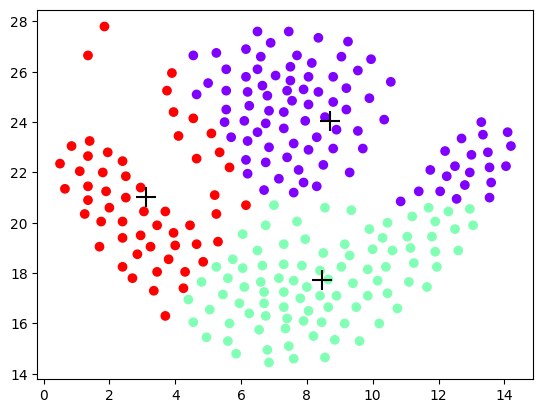

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3).fit(df_flame)

plt.scatter(df_flame['col1'], df_flame['col2'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black',
            marker="+", s=200)
plt.show()

#### Unsuccessful Example

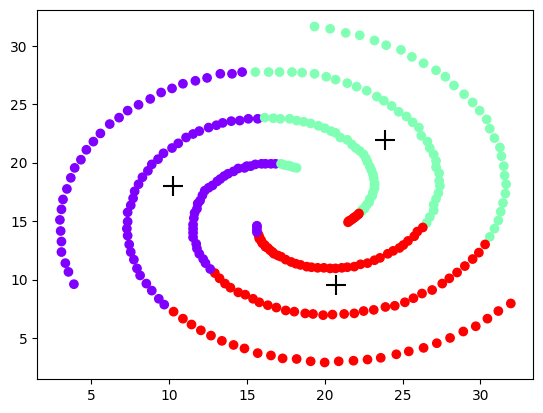

In [ ]:
kmeans = KMeans(n_clusters=3).fit(df_spiral)

plt.scatter(df_spiral['col1'], df_spiral['col2'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker="+", s=200)
plt.show()

## Agglomerative clustering

### Description

### Successful Example

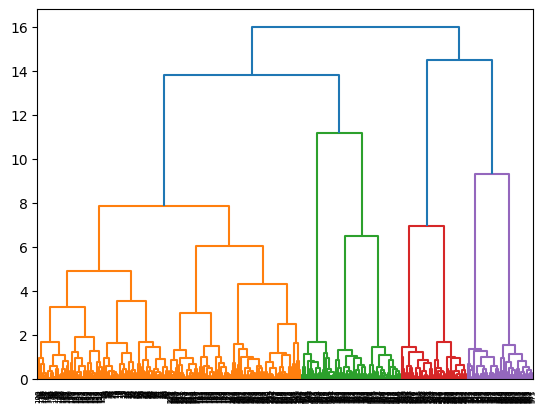

In [ ]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

df = df_r15

dend = shc.dendrogram(shc.linkage(df, method='complete'))

plt.show()

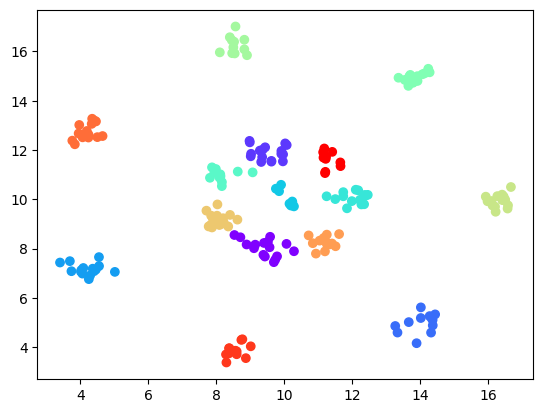

In [10]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt
df = df_r15

df = df.sample(n=200)
training_points = df[["col1", "col2"]]
training_labels = df["target"]

agglo = AgglomerativeClustering(n_clusters=15, linkage="ward").fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=agglo.labels_, cmap='rainbow')
plt.show()

### Unsuccessful Example

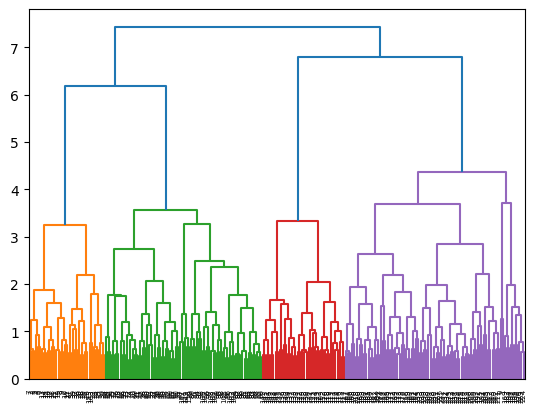

In [ ]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

df = df_flame

dend = shc.dendrogram(shc.linkage(df, method='average'))

plt.show()

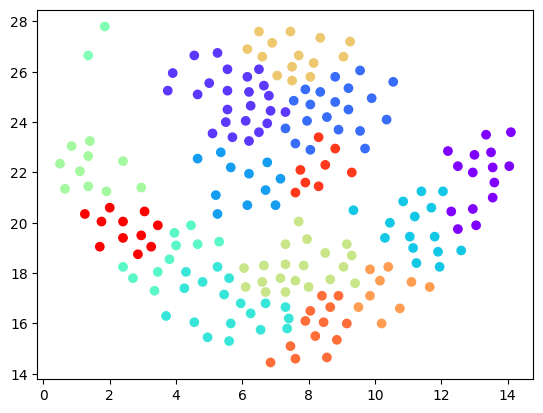

In [12]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt
df = df_flame

df = df.sample(n=200)
training_points = df[["col1", "col2"]]
training_labels = df["target"]

agglo = AgglomerativeClustering(n_clusters=15, linkage="complete").fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=agglo.labels_,
cmap='rainbow')
plt.show()

## DBSCAN

#### Description

In the case of DBSCAN,

> the algorithm is influenced by **density**. If there are at least minPts points within the epsilon radius of a point, that point becomes the core of a cluster.

For the spiral dataset,
> the points on each spiral are close together, allowing them to be grouped as a single cluster.

However, in the flame dataset,
> the clusters have varying densities, which causes DBSCAN to produce inaccurate results. The differing densities within each cluster make it difficult for DBSCAN to correctly identify and separate the clusters.

### Successful Example

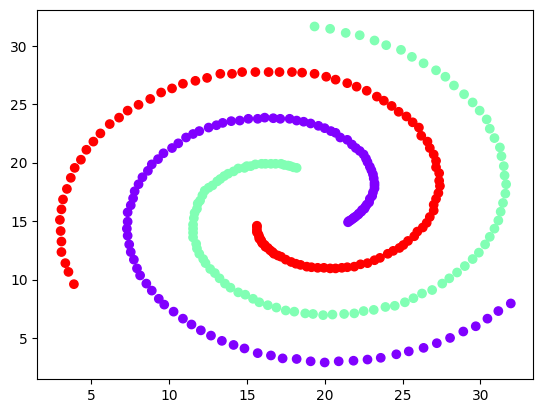

In [ ]:
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt

df = df_spiral

training_points = df[["col1", "col2"]]
training_labels = df["target"]
dbscan = DBSCAN(eps=2, min_samples=2).fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=dbscan.labels_, cmap='rainbow')
plt.show()

### Unsuccessful Example

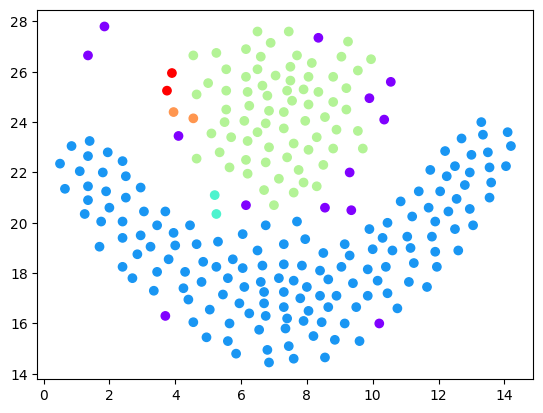

In [8]:
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt

df = df_flame

training_points = df[["col1", "col2"]]
training_labels = df["target"]
dbscan = DBSCAN(eps=0.8, min_samples=2).fit(training_points)
plt.scatter(training_points["col1"], training_points["col2"], c=dbscan.labels_, cmap='rainbow')
plt.show()